<a href="https://colab.research.google.com/github/AMSUCF/DHProgramming/blob/main/Bluesky_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Analysis with AI Assistance
*Building on Your Combinatorial Text Experience*

## Getting Started Reminders

### Before You Begin:
1. **Set up Bluesky credentials** in Colab Secrets (left sidebar → 🔑)
   - Add `BLUESKY_USERNAME` (your.handle.bsky.social)
   - Add `BLUESKY_APP_PASSWORD` (generate in Bluesky Settings → App Passwords)

2. **Review AI assistance levels** from the workshop:
   - **Level 1:** Code comprehension & debugging
   - **Level 2:** Conceptual application & adaptation  
   - **Level 3:** Critical evaluation & extension

### Jupyter Workflow Tips:
- **Test in new cells** before modifying working code
- **Comment out** previous versions instead of deleting
- **Use markdown cells** to document your AI conversations
- **Save successful iterations** before experimenting further

### Recommended Cell Organization:
1. **Setup Cell:** Libraries and authentication (run once)
2. **Data Collection Cell:** API calls (modify and re-run as needed)
3. **Processing Cell:** Clean and structure your data
4. **Analysis Cells:** Individual analyses (iterate with AI)
5. **Visualization Cell:** Final outputs and interpretations

---

## Step 1: Setup and Authentication
*Add your code cell below to install libraries and authenticate with Bluesky*

**AI Prompt Starters:**
- "Help me install the required libraries for Bluesky API and data analysis"
- "I'm getting an authentication error. What might be wrong?"
- "Show me how to securely store and access API credentials in Colab"

In [ ]:
# prompt: Install just the required libraries to access the Bluesky API

!pip install atproto
!pip install nltk

In [21]:
# prompt: Authenticate me to the Bluesky API using the secret names above

from google.colab import userdata
from atproto import Client

# Bluesky authentication
client = Client()
try:
  client.login(userdata.get('BLUESKY_USERNAME'), userdata.get('BLUESKY_APP_PASSWORD'))
  print("Bluesky authentication successful!")
except Exception as e:
  print(f"Bluesky authentication failed: {e}")
  print("Please check your BLUESKY_USERNAME and BLUESKY_APP_PASSWORD in Colab Secrets.")


Bluesky authentication successful!


In [22]:
# search for up to 10 matching posts
resp = client.app.bsky.feed.search_posts({
    "q": "#ai",
    "limit": 10
})

for post in resp.posts:
    author = post.author.handle
    text   = post.record.text
    print(f"@{author}: {text}\n")

@bluesky.awakari.com: Building Trust Through Consistent and Reliable Customer Support Systems Let’s be honest—customers have more choices than ever before. They can abandon a brand in seconds if they feel neglected, misunderstood, or left in the dark. While pricing and p...

| Details | Interest | Feed |

@rednishat.bsky.social: "There’s so much opportunity in this era of AI overviews, chatGPT and Gemini for trusted creators.  In this new search landscape, they’re more relevant than ever, bringing authenticity, expertise, and audience trust."

(h/t - Jim Louderback)

#AI #Authenticity #Creators

@pandorasworldai.bsky.social: Going for a cruise later through the Port of Bordeaux 🛳️ then to Bordeaux vineyard 🍇🍷❤️💋

Links in Bio🔗
for Support and my other Accounts 💋

#AI #AIModel #AICharacter #VirtualPinUpGirl #AIPhotoshoot #PandorasWorldAI 

Pandora is a AI Model & Virtual Pin Up Girl
Created for your Entertainment

@gidjvkfjcj7.bsky.social: Manga: Sweet Hospitality #AI #AIart #manga #man

## Step 2: Data Collection
*Create cells below to collect your research corpus from Bluesky*

**Consider:**
- What users or hashtags relate to your research interest?
- How many posts do you need for meaningful analysis?
- What time period should your data cover?

**AI Prompt Starters:**
- "Help me write a function to collect posts from specific users"
- "How do I search for posts containing certain hashtags?"
- "My data collection is only getting a few posts. How can I get more?"

In [23]:
all_posts = []
cursor = None
while len(all_posts) < 1000:
    params = {"q": "AI", "limit": 100}
    if cursor:
        params["cursor"] = cursor

    resp = client.app.bsky.feed.search_posts(params)
    batch = resp.posts
    if not batch:
        break

    all_posts.extend(batch)
    cursor = getattr(resp, "cursor", None)
    if not cursor:
        break

In [34]:
print(all_posts[0])

author=ProfileViewBasic(did='did:plc:me2bhmfzvnigavq7bmbj5zsk', handle='kriseilish9.bsky.social', associated=None, avatar='https://cdn.bsky.app/img/avatar/plain/did:plc:me2bhmfzvnigavq7bmbj5zsk/bafkreidet2g7oj4guneqtmjoxemre46j2hl7lkjlkvjavkunil3ofdlrce@jpeg', created_at='2025-01-30T10:31:53.613Z', display_name='Kris Eilish', labels=[], verification=None, viewer=ViewerState(blocked_by=False, blocking=None, blocking_by_list=None, followed_by=None, following=None, known_followers=None, muted=False, muted_by_list=None, py_type='app.bsky.actor.defs#viewerState'), py_type='app.bsky.actor.defs#profileViewBasic') cid='bafyreicncx3vx76255tff7jiu7zo2mhpy7oggbl672b2lpchl63x2r6oia' indexed_at='2025-05-27T19:18:24.712Z' record=Record(created_at='2025-05-27T19:18:22.455Z', text='Nazis are the problem. They have mastered the Art of Propaganda. Now they have Ai too ... This is it. No turning back. We must Win.', embed=None, entities=None, facets=None, labels=None, langs=['en'], reply=ReplyRef(parent=

In [36]:
from datetime import datetime, timedelta, timezone
import random

all_posts = []
cursor = None
# Collect more posts initially to have a better chance of getting posts from the last 7 days
# You might need to adjust this number depending on the volume of posts
max_posts_to_collect = 5000

while len(all_posts) < max_posts_to_collect:
    params = {"q": "AI", "limit": 100}
    if cursor:
        params["cursor"] = cursor

    resp = client.app.bsky.feed.search_posts(params)
    batch = resp.posts
    if not batch:
        break

    all_posts.extend(batch)
    cursor = getattr(resp, "cursor", None)
    if not cursor:
        break

# Calculate the date 7 days ago and make it timezone aware (UTC)
# Add timezone.utc to make seven_days_ago offset-aware
seven_days_ago = datetime.utcnow().replace(tzinfo=timezone.utc) - timedelta(days=7)


# Filter posts to include only those from the last 7 days
# Ensure 'post_created_at' is in datetime format and handle potential errors
filtered_posts = []
for post in all_posts:
    try:
        # The replace('Z', '+00:00') and fromisoformat already make this timezone aware
        created_at = datetime.fromisoformat(post.record.created_at.replace('Z', '+00:00'))
        # Now both created_at and seven_days_ago are offset-aware and can be compared
        if created_at >= seven_days_ago:
            filtered_posts.append(post)
    except ValueError:
        # Handle cases where the datetime string might be in an unexpected format
        # Use post.uri to identify the specific post that caused the error
        print(f"Could not parse datetime for post URI: {post.uri} with timestamp {post.record.created_at}")
        pass # Skip this post if datetime parsing fails


# Randomly sample up to 1000 posts from the filtered list
# Use min() to ensure we don't try to sample more posts than are available
sampled_posts = random.sample(filtered_posts, min(1000, len(filtered_posts)))

print(f"Collected {len(all_posts)} posts initially.")
print(f"Filtered down to {len(filtered_posts)} posts from the last 7 days.")
print(f"Sampled {len(sampled_posts)} posts.")

# Now 'sampled_posts' contains your 1000 randomly sampled posts from the last 7 days
# You can then process 'sampled_posts' as you would 'all_posts' in your subsequent steps.

Collected 5095 posts initially.
Filtered down to 5095 posts from the last 7 days.
Sampled 1000 posts.


In [37]:
# prompt: Save each (all_posts, filtered_posts, sampled_posts) to a csv file

import pandas as pd

def save_posts_to_csv(posts, filename):
  """Saves a list of Bluesky post objects to a CSV file."""
  data = []
  for post in posts:
    try:
      data.append({
          'uri': post.uri,
          'cid': post.cid,
          'author_did': post.author.did,
          'author_handle': post.author.handle,
          'text': post.record.text,
          'created_at': post.record.created_at,
          'reply_count': post.reply_count,
          'repost_count': post.repost_count,
          'like_count': post.like_count,
          'indexed_at': post.indexed_at,
      })
    except AttributeError as e:
        print(f"Skipping post due to missing attribute: {e} in post {getattr(post, 'uri', 'unknown')}")
        continue # Skip to the next post if an attribute is missing

  df = pd.DataFrame(data)
  df.to_csv(filename, index=False)
  print(f"Saved {len(data)} posts to {filename}")

# Save each list to a CSV file
save_posts_to_csv(all_posts, 'all_posts.csv')
save_posts_to_csv(filtered_posts, 'filtered_posts.csv')
save_posts_to_csv(sampled_posts, 'sampled_posts.csv')

Saved 5095 posts to all_posts.csv
Saved 5095 posts to filtered_posts.csv
Saved 1000 posts to sampled_posts.csv


## Step 3: Data Processing
*Transform raw API data into analysis-ready format*

**Key Tasks:**
- Convert API responses to pandas DataFrame
- Extract relevant features (timestamps, engagement, text length, etc.)
- Clean and validate your data

**AI Prompt Starters:**
- "Convert this Bluesky API response into a pandas DataFrame"
- "Help me extract and clean timestamps from social media data"
- "I have missing values in my dataset. How should I handle them?"

In [38]:
# assuming you have `all_posts` already populated...
import pandas as pd

records = []
for post in all_posts:
    author = post.author
    rec    = post.record

    # base fields
    row = {
        "author_handle":         author.handle,
        "author_display_name":   author.display_name,
        "author_did":            author.did,
        "author_avatar_url":     author.avatar,
        "author_created_at":     author.created_at,    # snake_case
        "post_text":             rec.text.replace("\n", " "),
        "post_created_at":       rec.created_at,       # snake_case
        "post_uri":              post.uri,
    }

    # any embedded URLs in facets (e.g. links)
    linked_urls = []
    if rec.facets:
        for facet in rec.facets:
            for feat in facet.features:
                # feature types can vary; Link has a `.uri`
                if hasattr(feat, "uri"):
                    linked_urls.append(feat.uri)
    row["linked_urls"] = ",".join(linked_urls) if linked_urls else None

    # if you want the post’s embed object (e.g. an image/video)
    if rec.embed:
        # different embed types have different attributes; here’s a generic catch:
        row["embed"] = rec.embed.dict()
    else:
        row["embed"] = None

    records.append(row)

# build the DataFrame
df = pd.DataFrame(records)

# inspect columns
print(df.columns.tolist())

# and write out as before
df.to_csv("/content/ai_posts_flat.csv", index=False)
print(f"Wrote {len(df)} rows to /content/ai_posts_flat.csv")


<ipython-input-38-7023f00ac483>:34: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  row["embed"] = rec.embed.dict()


['author_handle', 'author_display_name', 'author_did', 'author_avatar_url', 'author_created_at', 'post_text', 'post_created_at', 'post_uri', 'linked_urls', 'embed']
Wrote 5095 rows to /content/ai_posts_flat.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


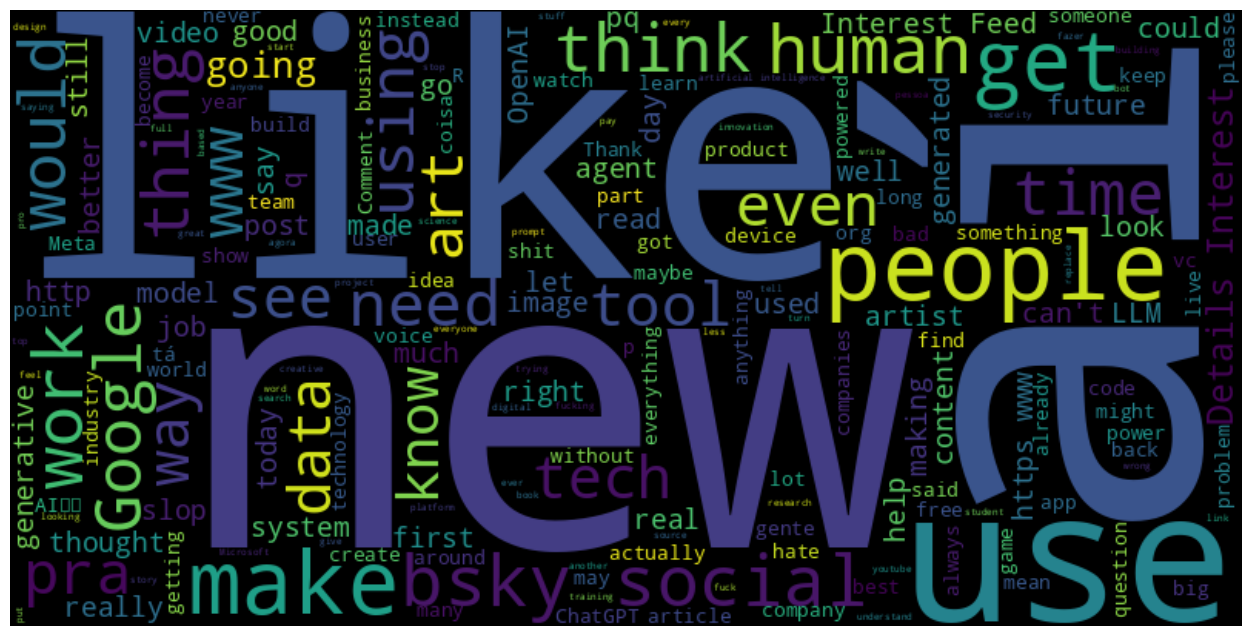

In [39]:
# prompt: Remove stopwords before generating the wordcloud (in all languages)

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Combine all post text into one string
text = ' '.join(df['post_text'].dropna().astype(str))

# Get a list of stopwords in all languages
stop_words = set(stopwords.words('azerbaijani'))
stop_words.update(stopwords.words('basque'))
stop_words.update(stopwords.words('bengali'))
stop_words.update(stopwords.words('catalan'))
stop_words.update(stopwords.words('chinese'))
stop_words.update(stopwords.words('danish'))
stop_words.update(stopwords.words('dutch'))
stop_words.update(stopwords.words('english'))
stop_words.update(stopwords.words('finnish'))
stop_words.update(stopwords.words('french'))
stop_words.update(stopwords.words('german'))
stop_words.update(stopwords.words('greek'))
stop_words.update(stopwords.words('hungarian'))
stop_words.update(stopwords.words('indonesian'))
stop_words.update(stopwords.words('italian'))
stop_words.update(stopwords.words('kazakh'))
stop_words.update(stopwords.words('nepali'))
stop_words.update(stopwords.words('norwegian'))
stop_words.update(stopwords.words('portuguese'))
stop_words.update(stopwords.words('romanian'))
stop_words.update(stopwords.words('russian'))
stop_words.update(stopwords.words('slovene'))
stop_words.update(stopwords.words('spanish'))
stop_words.update(stopwords.words('swedish'))
stop_words.update(stopwords.words('tajik'))
stop_words.update(stopwords.words('turkish'))

# Remove stopwords
words = text.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
wc = WordCloud(width=800, height=400, stopwords=stop_words).generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


## Step 4: Content Analysis
*Analyze patterns in your collected text data*

**Analysis Ideas:**
- Categorize posts by topic or theme
- Analyze word frequency and key terms
- Compare content types and their engagement

**AI Prompt Starters:**
- "Create a function to categorize posts based on academic, literary, or general content"
- "How do I analyze word frequency in my social media corpus?"
- "My text categorization isn't working well. Help me debug and improve it"

In [40]:
# prompt: Categorize posts into clusters

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Preprocess the text data
df['cleaned_text'] = df['post_text'].str.lower().str.replace('[^\w\s]', '', regex=True).fillna('')

# Use TF-IDF to convert text to numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])

# Determine the optimal number of clusters (e.g., using the elbow method, but for simplicity, we'll pick a number)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10) # Added n_init for KMeans
df['cluster'] = kmeans.fit_predict(X)

# Display the first few rows with their assigned cluster
print(df[['post_text', 'cluster']].head())

# Optional: Print top terms per cluster
print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(" ".join([terms[ind] for ind in order_centroids[i, :10]]))


                                           post_text  cluster
0  Besides, if it was real AI instead of just hig...        4
1  Eu pintei o meu, só que meu cabelo é muito esc...        3
2  United States: Meta is reportedly splitting it...        4
3  Also, some of you are so ardent in your opinio...        4
4                                         Aí dnv nao        3

Top terms per cluster:
Cluster 0:
ai da 2025 ive anos em vai se tem que
Cluster 1:
aiイラスト aiart aiartwork aiartcommunity aiartists nsfw synthart ai aiartist 10
Cluster 2:
new ai data details feed iot mhealth industry40 thoughts comment
Cluster 3:
aí que não eu um pra mas com uma por
Cluster 4:
ai like just use people ai摘要 im dont using art


## Step 5: Temporal Analysis
*Examine patterns over time in your data*

**Questions to Explore:**
- When are users most active?
- How does engagement vary by time of day or day of week?
- Are there notable spikes or patterns in posting activity?

**AI Prompt Starters:**
- "Analyze posting patterns by hour and day of week in my dataset"
- "How do I identify unusual activity periods in my temporal data?"
- "Create visualizations showing posting activity over time"


Posting frequency by hour:
hour
0     203
1     183
2     148
3     152
4     125
5      92
6      93
7      93
8      94
9     125
10    100
11    190
12    142
13    224
14    269
15    434
16    293
17    309
18    327
19    348
20    325
21    287
22    268
23    249
Name: count, dtype: int64

Posting frequency by day of week:
day_of_week
0    871
1    707
2    775
3    777
4    724
5    631
6    588
Name: count, dtype: int64


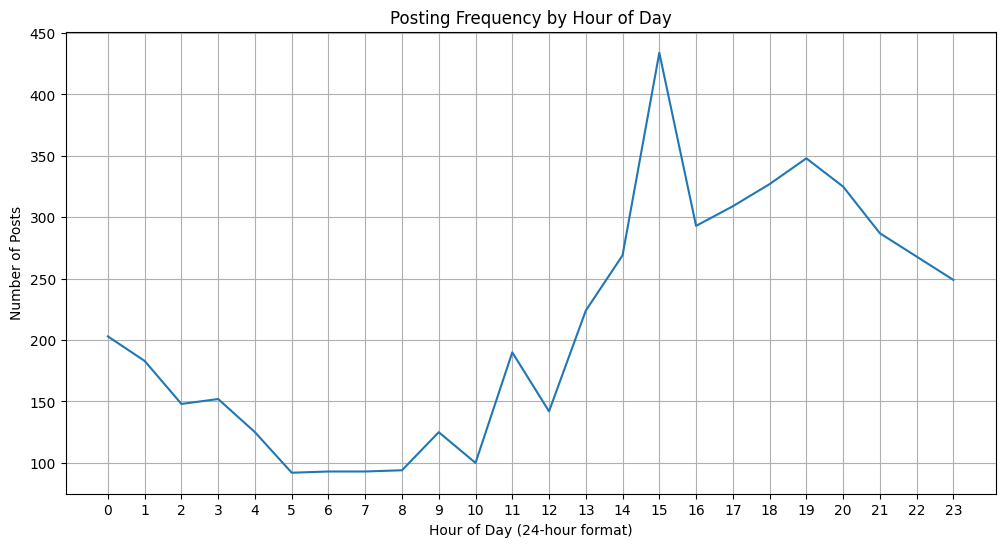

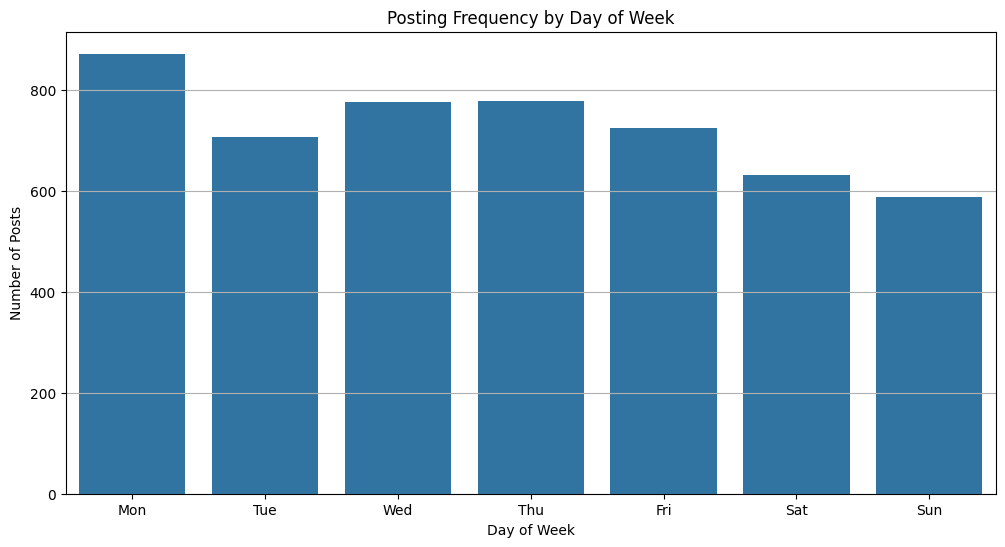

In [43]:
# prompt: Analyze posting patterns by hour and day of week in my dataset

# Ensure 'post_created_at' is in datetime format
# Use format='ISO8601' to correctly parse the datetime strings
# Add errors='coerce' to handle any potential parsing issues gracefully by turning invalid dates into NaT (Not a Time)
df['post_created_at'] = pd.to_datetime(df['author_created_at'], format='ISO8601', errors='coerce')

# Drop rows where 'post_created_at' could not be parsed and is now NaT
df.dropna(subset=['post_created_at'], inplace=True)

# Extract hour of the day and day of the week
df['hour'] = df['post_created_at'].dt.hour
df['day_of_week'] = df['post_created_at'].dt.dayofweek # Monday=0, Sunday=6

# Analyze posting frequency by hour
posts_by_hour = df['hour'].value_counts().sort_index()
print("\nPosting frequency by hour:")
print(posts_by_hour)

# Analyze posting frequency by day of week
posts_by_day = df['day_of_week'].value_counts().sort_index()
print("\nPosting frequency by day of week:")
print(posts_by_day)

# Optional: Create visualizations for temporal patterns
import matplotlib.pyplot as plt
import seaborn as sns

# Plot posting frequency by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x=posts_by_hour.index, y=posts_by_hour.values)
plt.title('Posting Frequency by Hour of Day')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Posts')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Plot posting frequency by day of week
plt.figure(figsize=(12, 6))
sns.barplot(x=posts_by_day.index, y=posts_by_day.values)
plt.title('Posting Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Posts')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y')
plt.show()

## Step 6: Visualization
*Create compelling visualizations of your findings*

**Visualization Goals:**
- Make patterns visible and interpretable
- Support your analytical arguments
- Communicate findings to your intended audience

**AI Prompt Starters:**
- "Create a comprehensive dashboard showing key patterns in my social media data"
- "This scatter plot is too crowded. How can I make it clearer?"
- "What additional visualizations would reveal patterns I might be missing?"

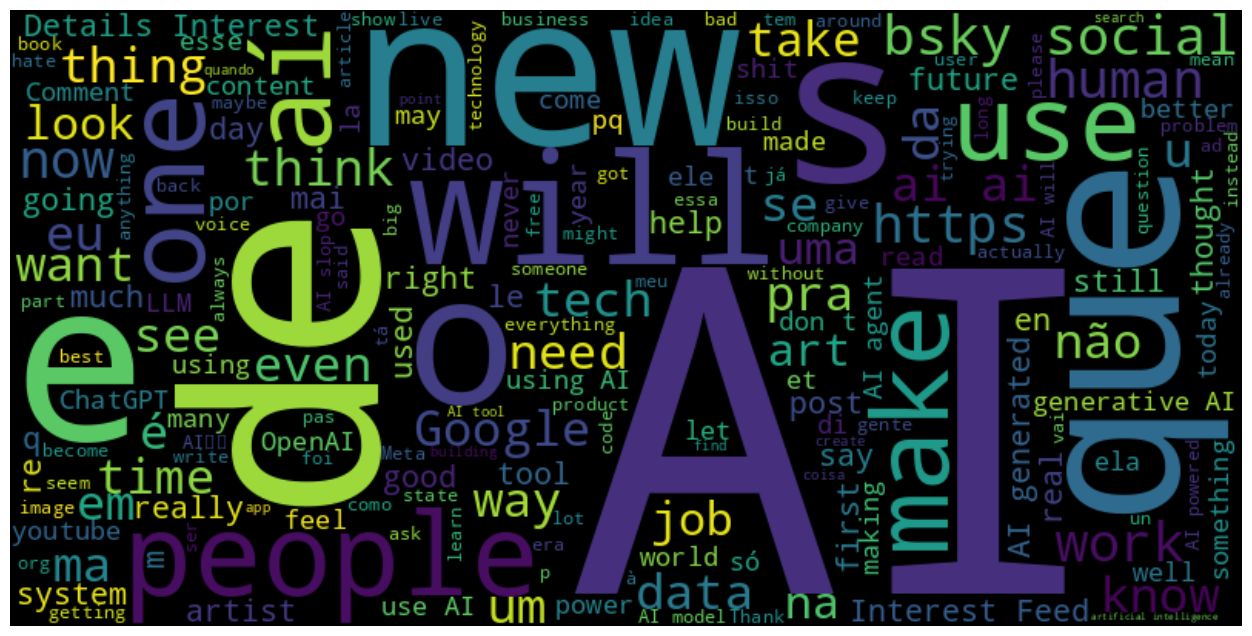

In [44]:
# Install necessary library
!pip install wordcloud

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the saved posts CSV
df = pd.read_csv('/content/ai_posts_flat.csv')

# Combine all post text into one string
text = ' '.join(df['post_text'].dropna().astype(str))

# Generate the word cloud
wc = WordCloud(width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


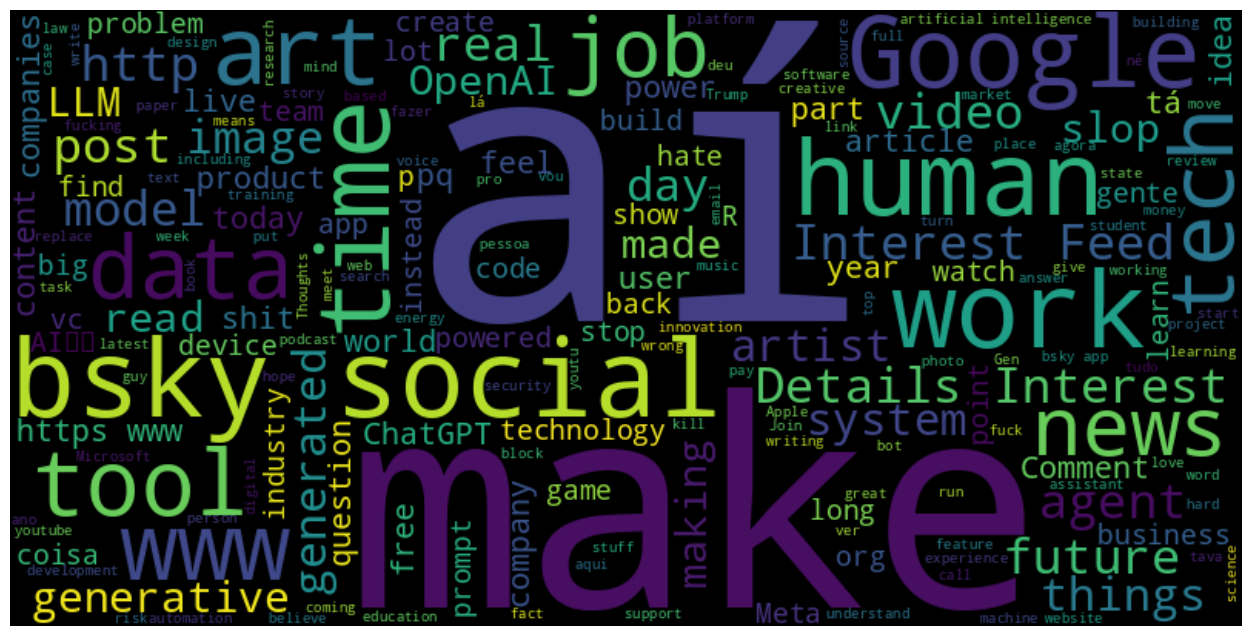

In [45]:
# prompt: Remove stopwords before generating the wordcloud (in all languages)

import nltk
# Download all stopwords data explicitly
nltk.download('stopwords', download_dir='/root/nltk_data', quiet=True)
from nltk.corpus import stopwords

# Load the saved posts CSV (assuming df is defined in a previous cell and is accessible)
# If not, you would need to reload it:
# import pandas as pd
# df = pd.read_csv('/content/ai_posts_flat.csv')


# Combine all post text into one string
text = ' '.join(df['post_text'].dropna().astype(str))

# Get a list of stopwords in all languages
# It's more efficient to iterate through all available languages instead of listing them manually
all_languages = stopwords.fileids()
stop_words = set()
for lang in all_languages:
    try:
        stop_words.update(stopwords.words(lang))
    except OSError:
        # This catch is unlikely after the explicit download, but good practice
        print(f"Could not load stopwords for language: {lang}")


# Remove stopwords
words = text.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
# Pass the stop_words set directly to the WordCloud constructor for potentially better handling
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=800, height=400, stopwords=stop_words).generate(filtered_text)

# Display the word cloud
plt.figure(figsize=(16, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Step 7: Interpretation and Analysis
*Connect computational findings to your research questions*

**Critical Questions:**
- What do these patterns reveal about the community or phenomenon you're studying?
- How do computational findings compare to traditional research methods?
- What are the limitations of your approach and data?

**AI Prompt Starters:**
- "Help me interpret these engagement patterns in the context of [your discipline]"
- "What are the potential biases in my social media dataset?"
- "How can I validate these computational results against other sources?"

## Advanced Extensions (Optional)
*For deeper analysis if you have time and interest*

**Possible Extensions:**
- Network analysis of user interactions
- Topic modeling to identify themes
- Sentiment analysis of posts
- Comparison with other datasets or time periods

**AI Prompt Starters:**
- "Help me implement basic network analysis for user mentions in my data"
- "Create a topic modeling analysis to identify themes in my corpus"
- "How do I add sentiment analysis to my existing content analysis?"

---
## Notes and Reflections
*Use this space to document your process, interesting findings, and AI interactions*

### What worked well:
-

### Challenges encountered:
-

### Most helpful AI interactions:
-

### Key insights from your analysis:
-

### Questions for further research:
-